In [1]:
import csv
import numpy as np
import pandas as pd 
import collections
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Resources/Game_Sales_Clean.csv',index_col=0)
df['Year_of_Release'] = df['Year_of_Release'].astype(np.int64)

In [2]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


# What game has the highest sales in the world and what are its sales within multiple nations?

In [3]:
#df_1 contains Name , sales in different nations columns and df_2 returns the groupby Name col of df_1 
df_1 = df[['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df_2 = df_1.groupby('Name').sum()
#df_2.to_csv('gruopby_name.csv')
df_3 = df_2.sort_values(by = ['Global_Sales'], ascending=False).head(15)
df_3

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,
Wii Sports,41.36,28.96,3.77,8.45,82.53
Grand Theft Auto V,23.84,23.42,1.42,7.90,56.57
Mario Kart Wii,15.68,12.76,3.79,3.29,35.52
Wii Sports Resort,15.61,10.93,3.28,2.95,32.77
Call of Duty: Modern Warfare 3,15.54,11.15,0.62,3.29,30.59
New Super Mario Bros.,11.28,9.14,6.50,2.88,29.80
Call of Duty: Black Ops II,14.08,10.84,0.72,3.76,29.40
Call of Duty: Black Ops,16.99,8.54,0.59,3.08,29.19
Wii Play,13.96,9.18,2.93,2.84,28.92


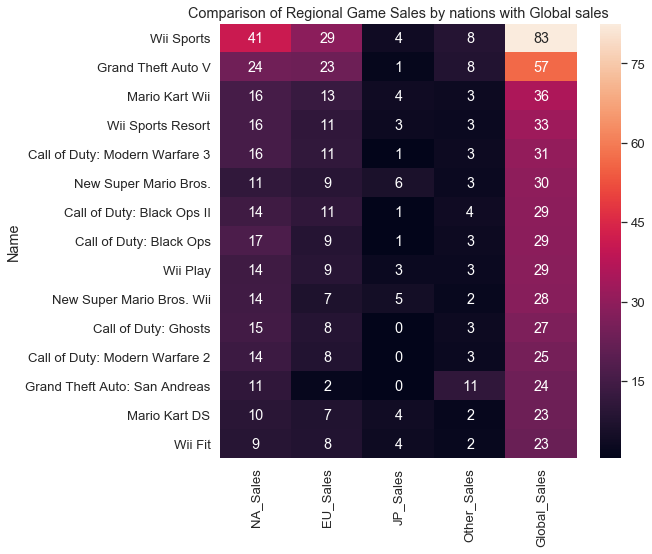

In [4]:
regions = ['JP', 'NA', 'EU', 'Other', 'Global']
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(df_3, annot=True, fmt='.0f')
plt.title("Comparison of Regional Game Sales by nations with Global sales")
plt.savefig("Images/Comp Reg Game sales by nation with Global sales.png")
plt.show()

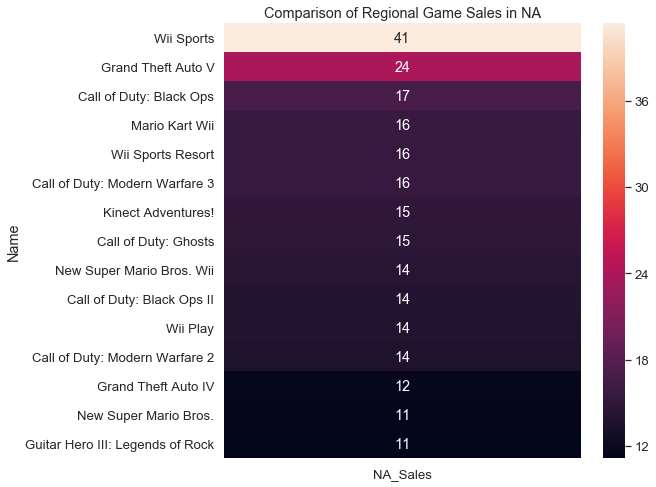

In [5]:
result = df_2.sort_values(by = ['NA_Sales'], ascending=False).head(15)
result_1 = result[['NA_Sales']]
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(result_1, annot=True, fmt='.0f')
plt.title("Comparison of Regional Game Sales in NA")
plt.savefig("Images/Comp Reg Game sales in NA.png")
plt.show()

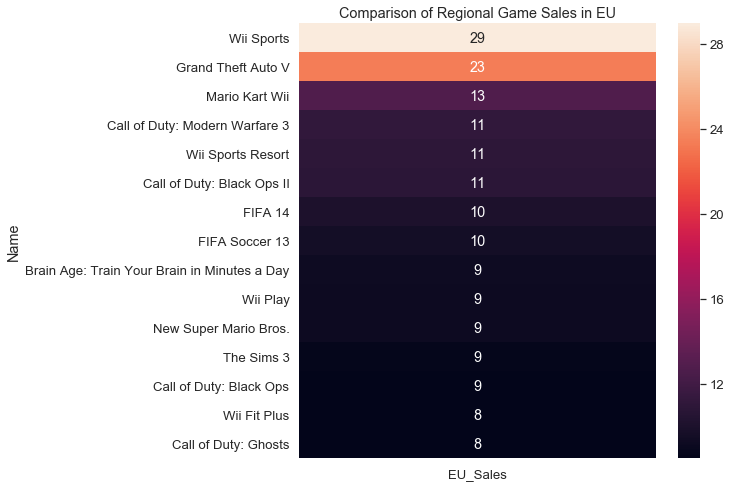

In [6]:
result_2 = df_2.sort_values(by = ['EU_Sales'], ascending=False).head(15)
result_3 = result_2[['EU_Sales']]
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(result_3, annot=True, fmt='.0f')
plt.title("Comparison of Regional Game Sales in EU")
plt.savefig("Images/Comp Reg Game sales in EU.png")
plt.show()


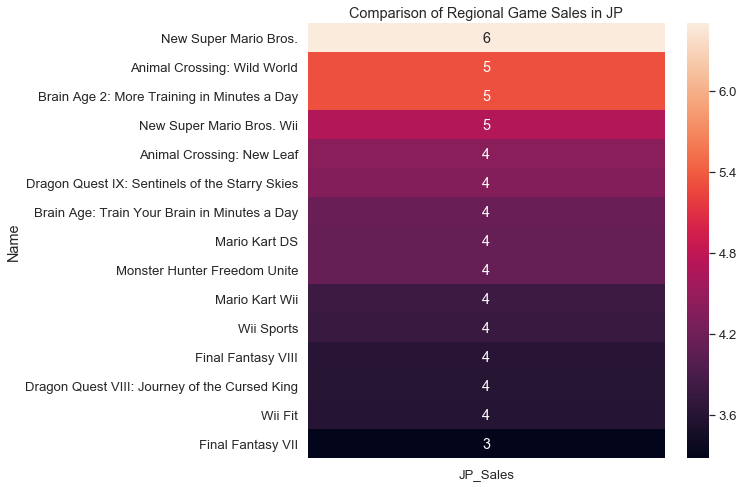

In [7]:
result_4 = df_2.sort_values(by = ['JP_Sales'], ascending=False).head(15)
result_5 = result_4[['JP_Sales']]
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(result_5, annot=True, fmt='.0f')
plt.title("Comparison of Regional Game Sales in JP")
plt.savefig("Images/Comp Reg Game sales in JP.png")
plt.show()

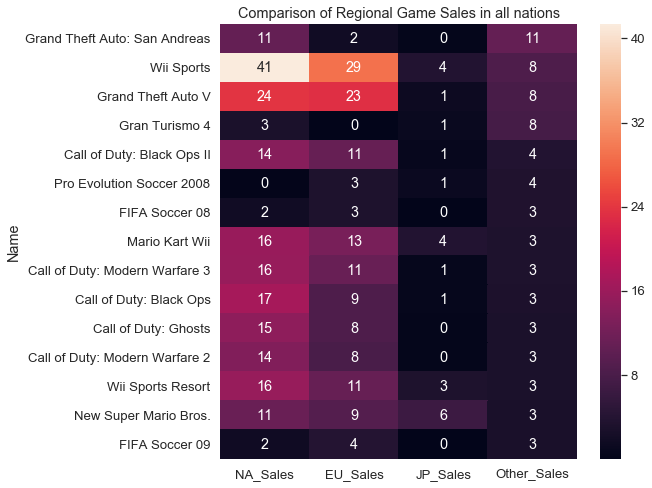

In [8]:
result_6 = df_2.sort_values(by = ['Other_Sales'], ascending=False).head(15)
result_7 = result_6[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(result_7, annot=True, fmt='.0f')
plt.title("Comparison of Regional Game Sales in all nations")

plt.savefig("Images/Comp Reg Game sales in all nations.png")
plt.show()

# Which type of platform is popular?
# as per no of game released on this platform

In [9]:
#df_4 contains name and platform info
df_4 = df[['Name', 'Platform']]
df_5 = df_4.groupby('Platform').count()
df_6 = df_5.sort_values(by = ['Name'], ascending=False)
df_6

,Name
Platform,
PS2,1140
X360,858
PS3,769
PC,651
XB,565
Wii,479
DS,464
PSP,390
GC,348


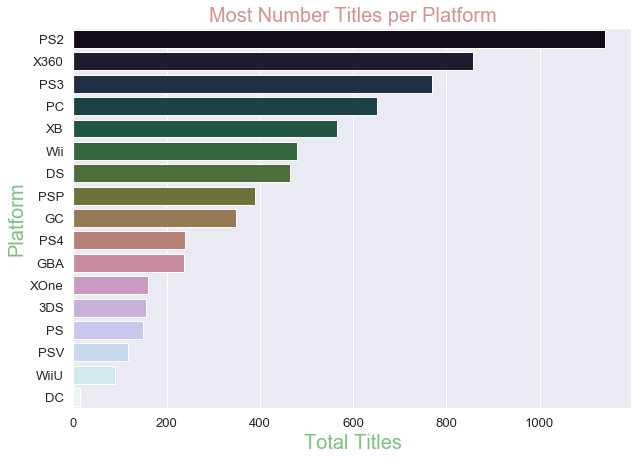

In [10]:
plt.subplots(figsize=(10,7))
ax = sns.barplot(x=df_6['Name'] , y=df_6.index, palette='cubehelix')
ax.set_title('Most Number Titles per Platform', color='Brown', alpha=0.5, size=20)
ax.set_xlabel('Total Titles', color='green', alpha=0.5, size=20)
ax.set_ylabel('Platform', color='green', alpha=0.5, size=20)

plt.savefig("Images/popular platform.png")

# Comparison Reg. Games sales by genre

In [11]:
df_7 = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df_8 = df_7.groupby('Genre').sum()
#df_2.to_csv('gruopby_name.csv')
df_9 = df_8.sort_values(by = ['Global_Sales'], ascending=False).head(15)

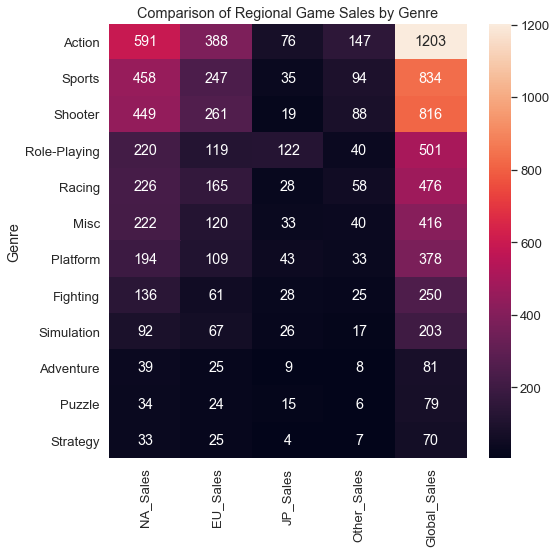

In [12]:
regions = ['JP', 'NA', 'EU', 'Other', 'Global']
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(df_9, annot=True, fmt='.0f')
plt.title("Comparison of Regional Game Sales by Genre")
plt.savefig("Images/Comparison of Regional Game Sales by Genre.png")
plt.show()

# Top publishers by Global Sales

In [13]:
df_10 = df[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
df_11 = df_10.groupby('Publisher').sum()
#df_2.to_csv('gruopby_name.csv')
df_12 = df_11.sort_values(by = ['Global_Sales'], ascending=False).head(15)

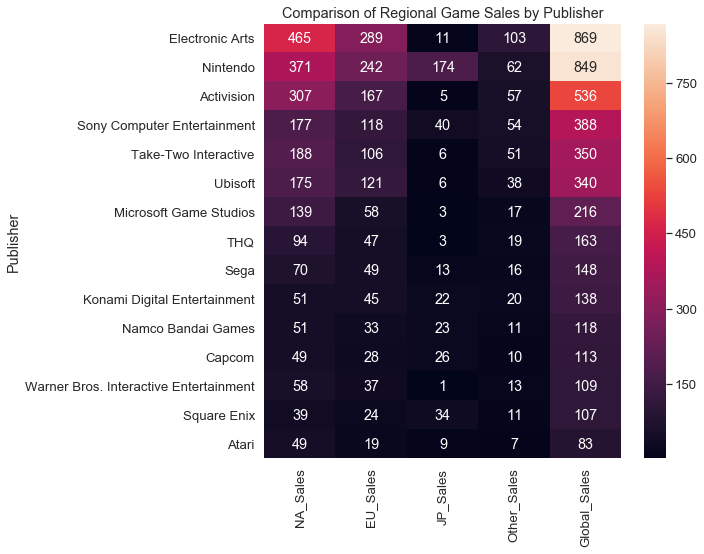

In [14]:
regions = ['JP', 'NA', 'EU', 'Other', 'Global']
plt.figure(figsize=(8, 8))
sns.set(font_scale=1.2)
sns.heatmap(df_12, annot=True, fmt='.0f')
plt.title("Comparison of Regional Game Sales by Publisher")
plt.savefig("Images/Comparison of Regional Game Sales by Publishers.png")
plt.show()

# Platforms popularity along with year

/anaconda3/envs/PythonData/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


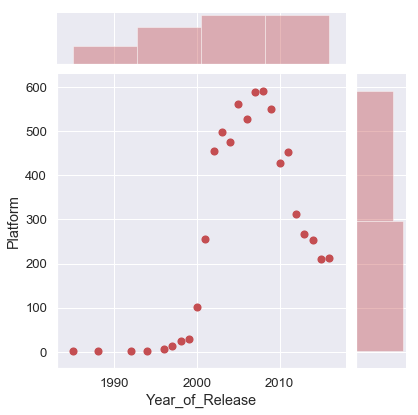

<Figure size 7200x7200 with 0 Axes>

In [15]:
df_13 = df[['Year_of_Release', 'Platform']]
df_14 = pd.DataFrame(df_13.groupby('Year_of_Release').count())
graph = sns.jointplot(x=df_14.index, y=df_14['Platform'],color='r')
graph.x = df_14.index
graph.y = df_14['Platform']
plt.figure(figsize=(100, 100))
graph.plot_joint(plt.scatter, marker='o', c='r', s=50)
plt.savefig("Images/jointplot.png")

In [16]:
df_15 = df[['Year_of_Release','Platform']]
df_16 = df_15.groupby('Year_of_Release').count()
df_16

,Platform
Year_of_Release,
1985,1
1988,1
1992,1
1994,1
1996,7
1997,13
1998,25
1999,30
2000,102


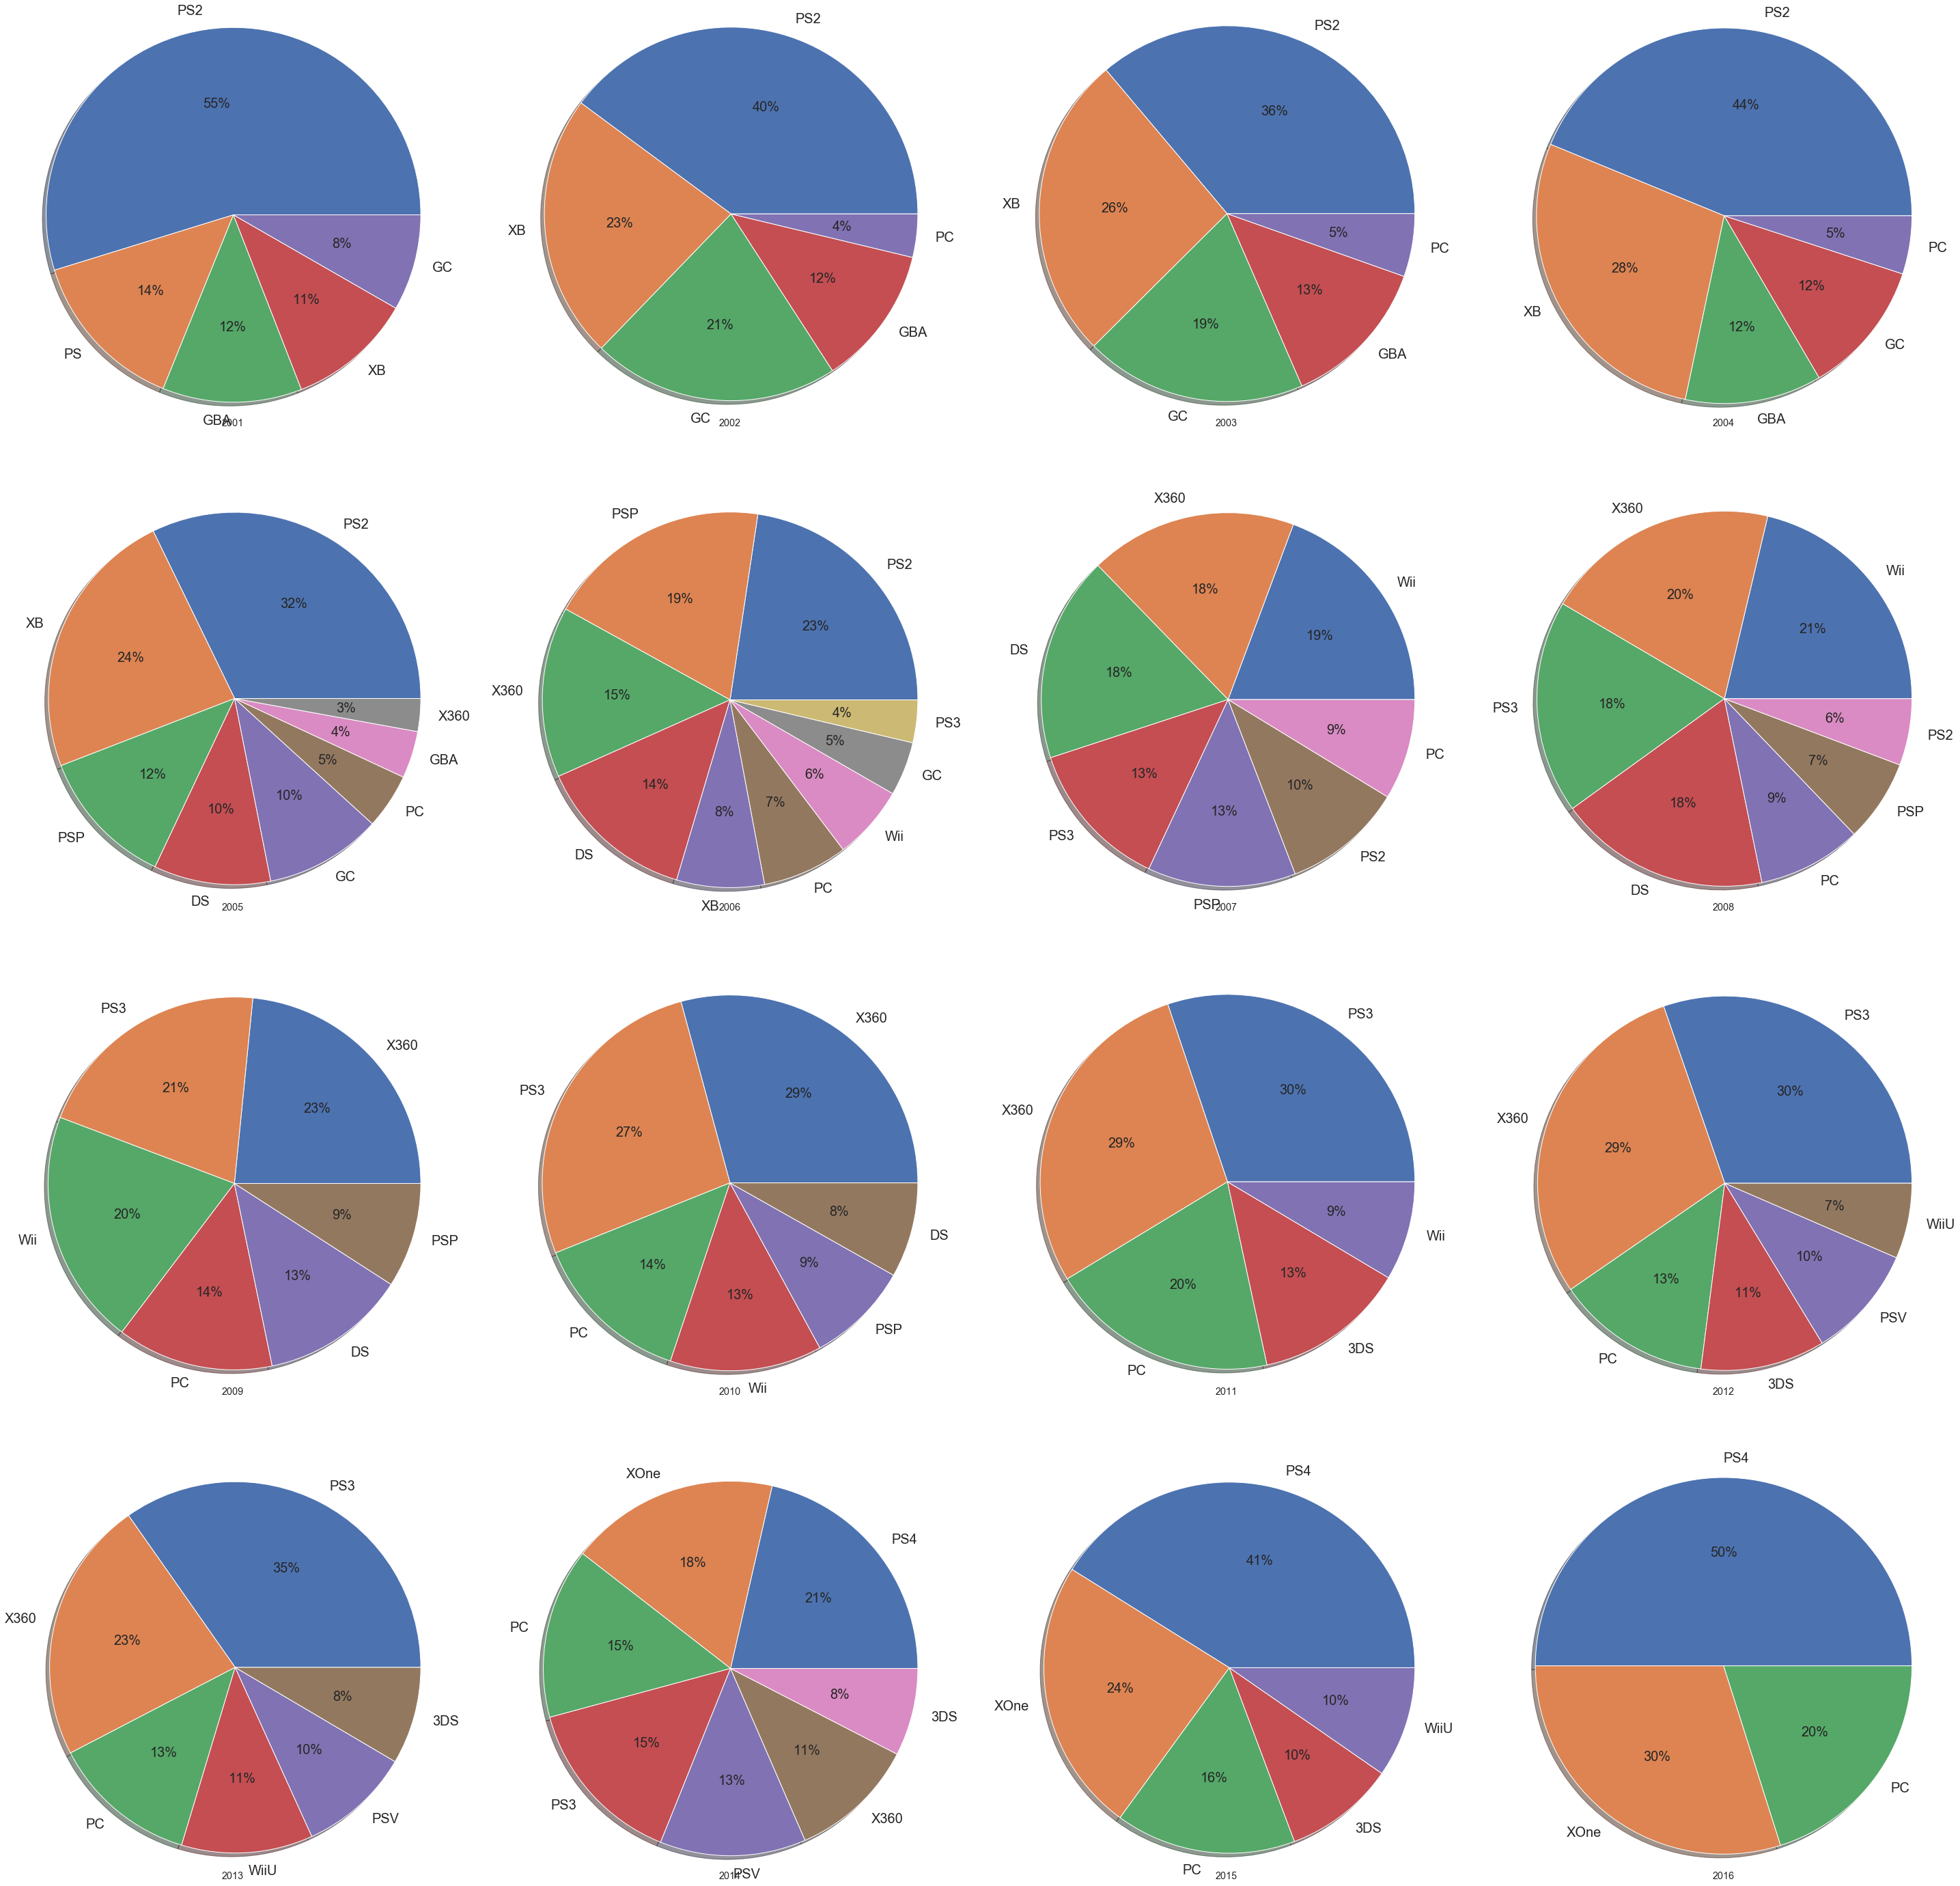

In [17]:
plt.figure(figsize=(50,50))
length_of_rows = 4
length_of_columns = 4
years = [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]
for i in range(len(years)):
    plt.subplot(length_of_rows,length_of_columns,i+1)
    plats = df[df.Year_of_Release == years[i]]
    plats = plats.Platform.value_counts().reset_index()
    plats.rename(columns={'index':'Platform', 'Platform':'count'}, inplace=True)
    plats = plats[plats['count'] > 15]
    plt.pie(x=plats['count'], labels=plats['Platform'], textprops={'fontsize': 20},autopct='%.0f%%', shadow=True)
    plt.xlabel(years[i])
    plt.axis("equal")
    plt.savefig("Images/Comparison of Platform based Games by year.png")

In [18]:
plats, # 

(  Platform  count
 0      PS4     92
 1     XOne     55
 2       PC     37,)

# Showing genres with respect to top trending platforms

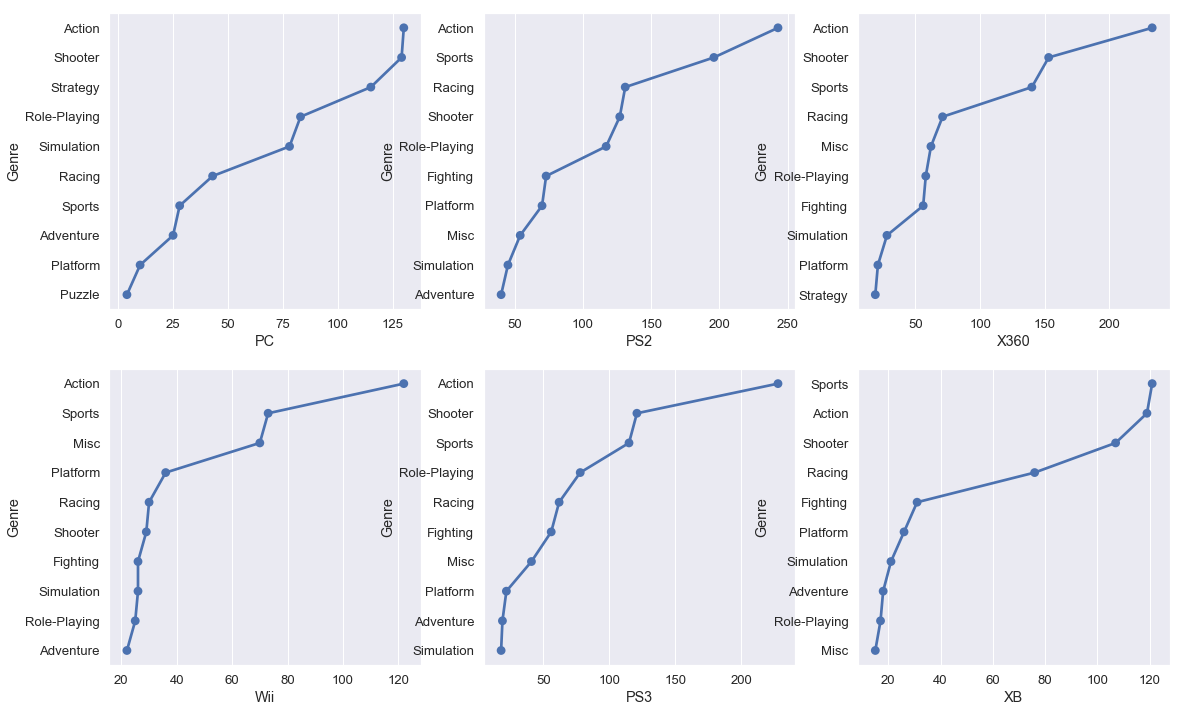

<Figure size 432x288 with 0 Axes>

In [19]:
plt.figure(figsize=(19,12))
length_of_rows = 2
length_of_columns = 3
platform_genres = ['PC', 'PS2', 'X360', 'Wii', 'PS3', 'XB']
for i in range(len(platform_genres)):
    genre_plat = df.groupby(['Platform','Genre']).size().reset_index()
    genre_plat.rename(columns={0:'count'}, inplace=True)
    genre_plat = genre_plat[genre_plat['Platform'] == platform_genres[i]].sort_values(by='count', ascending=False)[:10]
    plt.subplot(length_of_rows, length_of_columns, i+1)
    sns.pointplot(y=genre_plat['Genre'], x=genre_plat['count'])
    plt.xlabel(platform_genres[i])
plt.show()
plt.savefig("Images/Comparison of genres with respect to top trending platforms.png")

# Genre with User score

In [20]:
genres = df.groupby('Genre')['Genre']
genres_count=genres.count()
large_genres=genres_count[genres_count>=50]
large_genres.sort_values(ascending=False,inplace=True)
large_genres



Genre
Action          1630
Sports           943
Shooter          864
Role-Playing     712
Racing           581
Platform         403
Misc             384
Fighting         378
Simulation       297
Strategy         267
Adventure        248
Puzzle           118
Name: Genre, dtype: int64

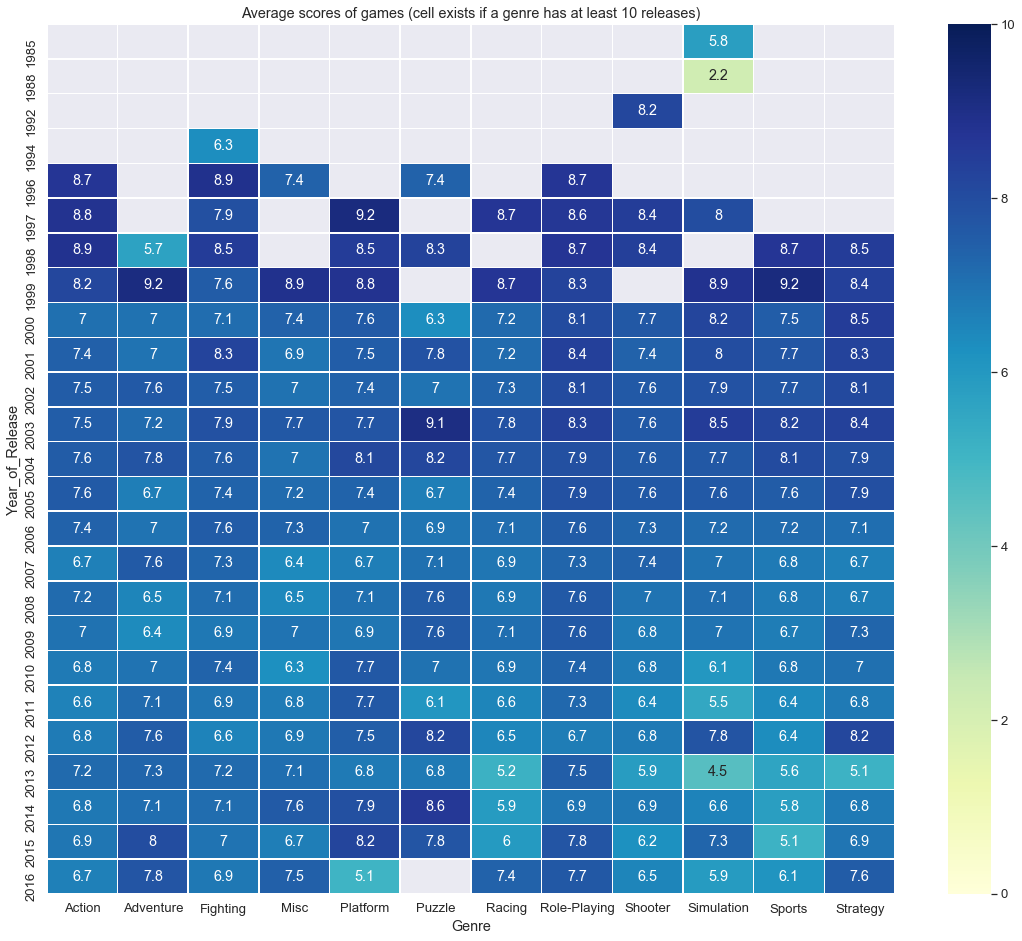

In [21]:
data_genre = df[df['Genre'].isin(large_genres.keys())]
table_score = pd.pivot_table(data_genre,values=['User_Score'],index=['Year_of_Release'],columns=['Genre'],aggfunc='mean',margins=False)
table_count = pd.pivot_table(data_genre,values=['User_Score'],index=['Year_of_Release'],columns=['Genre'],aggfunc='count',margins=False)
table = table_score[table_count > 0]
plt.figure(figsize=(19,16))
sns.heatmap(table.User_Score,linewidths=.5,annot=True,vmin=0,vmax=10,cmap='YlGnBu')
plt.title('Average scores of games (cell exists if a genre has at least 10 releases)')
plt.savefig("Images/Genre with User score.png")

# Platform with User score

In [22]:
platform = df.groupby('Platform')['Platform']
platform_count=platform.count()
large_plats=platform_count[platform_count>=50]
large_plats.sort_values(ascending=False,inplace=True)
large_plats

Platform
PS2     1140
X360     858
PS3      769
PC       651
XB       565
Wii      479
DS       464
PSP      390
GC       348
PS4      239
GBA      237
XOne     159
3DS      155
PS       150
PSV      118
WiiU      89
Name: Platform, dtype: int64

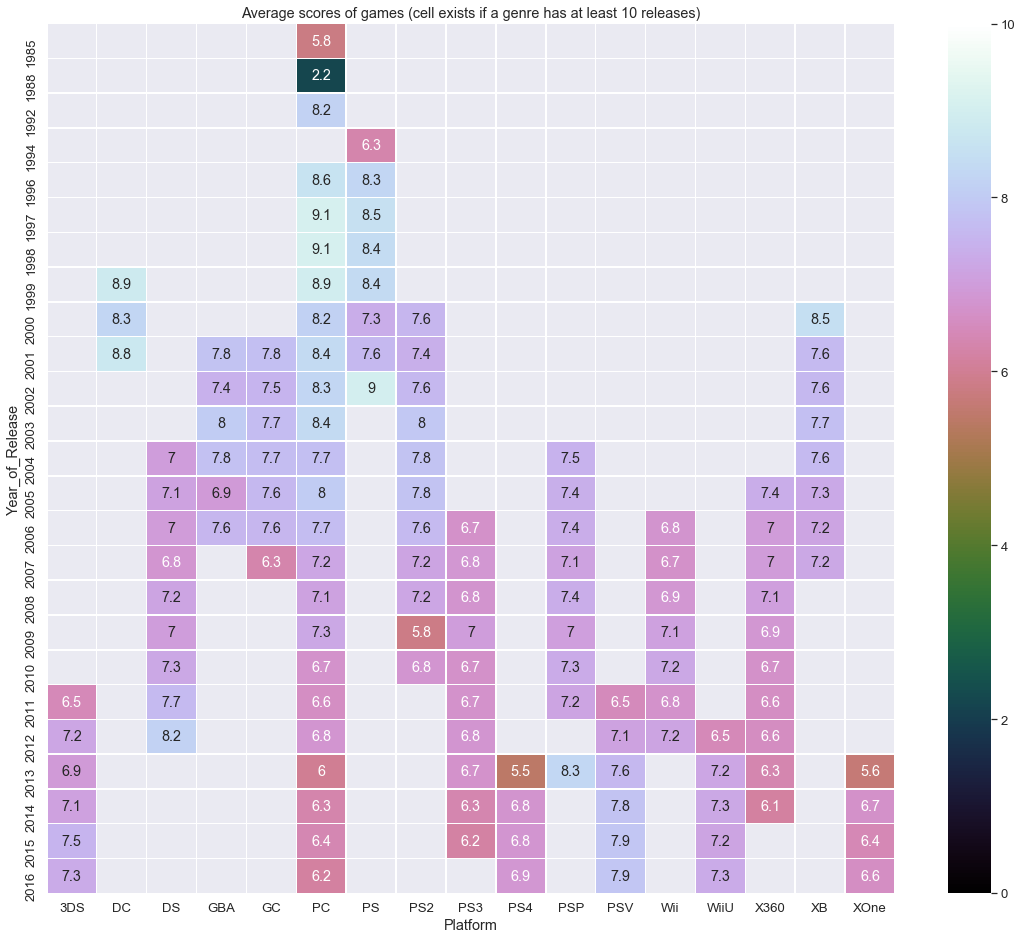

In [23]:
data_plats = df[df['Platform'].isin(large_plats.keys())]
table_score_1 = pd.pivot_table(data_genre,values=['User_Score'],index=['Year_of_Release'],columns=['Platform'],aggfunc='mean',margins=False)
table_count_1 = pd.pivot_table(data_genre,values=['User_Score'],index=['Year_of_Release'],columns=['Platform'],aggfunc='count',margins=False)
table_1 = table_score_1[table_count_1 > 0]
plt.figure(figsize=(19,16))
sns.heatmap(table_1.User_Score,linewidths=.5,annot=True,vmin=0,vmax=10,cmap='cubehelix')
plt.title('Average scores of games (cell exists if a genre has at least 10 releases)')
plt.savefig("Images/Platform with User score.png")

# Genre with Critic score

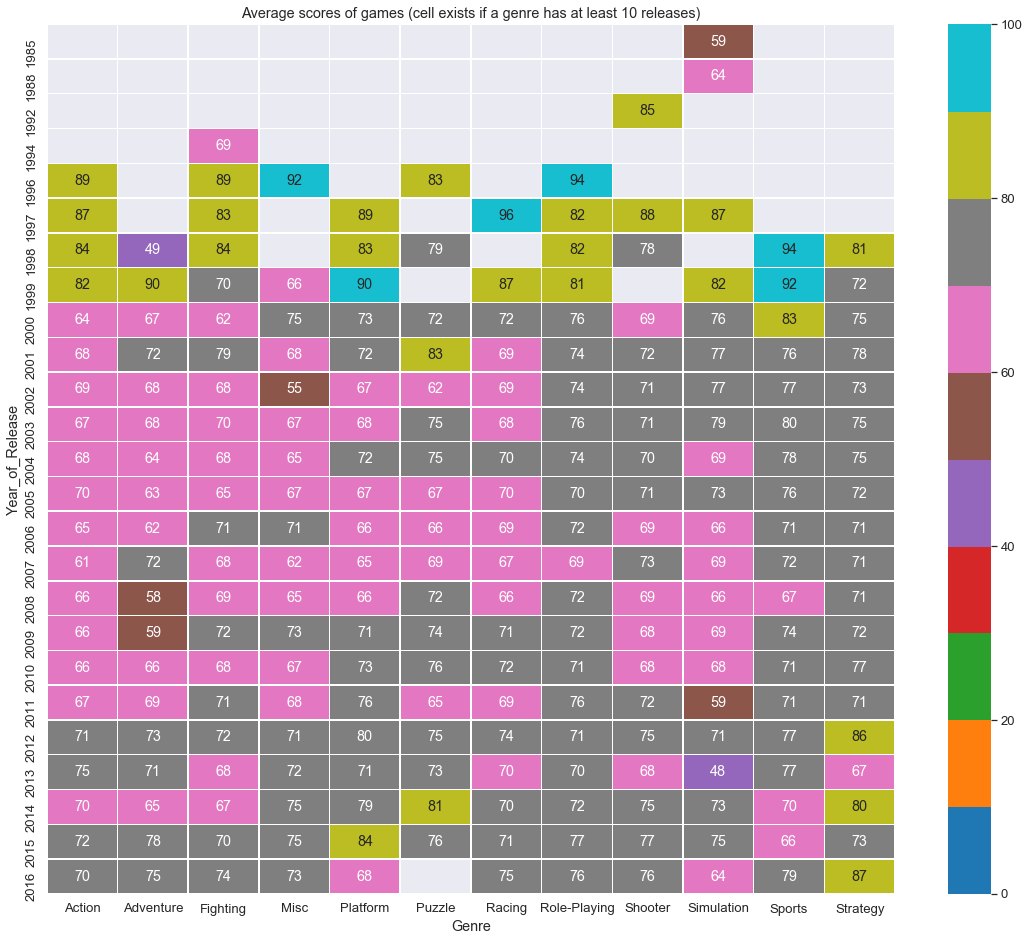

In [24]:
data_genre_2 = df[df['Genre'].isin(large_genres.keys())]
table_score_2 = pd.pivot_table(data_genre,values=['Critic_Score'],index=['Year_of_Release'],columns=['Genre'],aggfunc='mean',margins=False)
table_count_2 = pd.pivot_table(data_genre,values=['Critic_Score'],index=['Year_of_Release'],columns=['Genre'],aggfunc='count',margins=False)
table_2 = table_score_2[table_count_2 > 0]
plt.figure(figsize=(19,16))
sns.heatmap(table_2.Critic_Score,linewidths=.5,annot=True,vmin=0,vmax=100,cmap='tab10')
plt.title('Average scores of games (cell exists if a genre has at least 10 releases)')
plt.savefig("Images/Genre with çritic score.png")

# Platform with Critic Score 

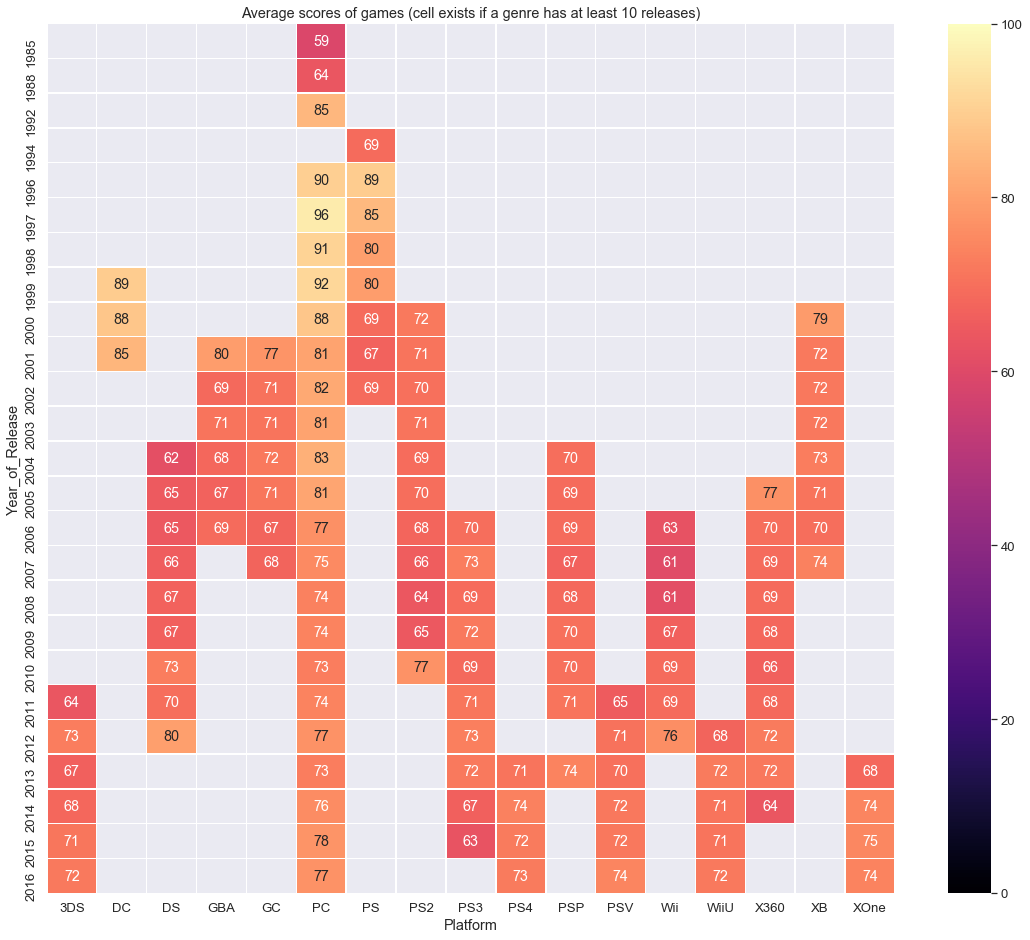

In [25]:
data_plats_2 = df[df['Platform'].isin(large_plats.keys())]
table_score_3 = pd.pivot_table(data_genre,values=['Critic_Score'],index=['Year_of_Release'],columns=['Platform'],aggfunc='mean',margins=False)
table_count_3 = pd.pivot_table(data_genre,values=['Critic_Score'],index=['Year_of_Release'],columns=['Platform'],aggfunc='count',margins=False)
table_3 = table_score_3[table_count_3 > 0]
plt.figure(figsize=(19,16))
sns.heatmap(table_3.Critic_Score,linewidths=.5,annot=True,vmin=0,vmax=100,cmap='magma')
plt.title('Average scores of games (cell exists if a genre has at least 10 releases)')
plt.savefig("Images/platform with critic score.png")

# Critic Score based games Global sale over the years
# and 
# User Score based games Global sale over the years

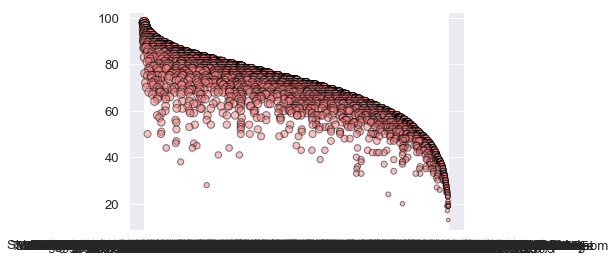

In [26]:
df_17 = df[['Name','Critic_Score']].sort_values('Critic_Score', ascending = False)
plt.scatter(df_17['Name'], df_17['Critic_Score'], marker="o", facecolors="lightcoral",
           edgecolors="black", s=df_17['Critic_Score'], alpha = 0.5, label = "Urban")
plt.show()

In [ ]:
import nltk
nltk.download('popular')

t = df['Name'].apply(nltk.word_tokenize).sum()

from collections import Counter
from string import punctuation

def content_text(text):
    stopwords = set(nltk.corpus.stopwords.words('english'))
    without_stp  = Counter()
    for word in text:
        word = word.lower()
        if len(word) < 3:
            continue
        if word not in stopwords:
            without_stp.update([word])
    return [(y,c) for y,c in without_stp.most_common(20)]

without_stop = content_text(t)
without_stop

from PIL import Image
import random
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(t)
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color='white', max_font_size=50, stopwords=stopwords, 
                      random_state=3, relative_scaling=.5).generate(text)
plt.figure(figsize=(15,18))
plt.imshow(wordcloud)
plt.axis('off')